# Тезаурусы и другие представления значений

# Еникеева Е.В.

# 2022

# Краткое содержание

1. В задаче NER говорили о словарях предметной области (названия профессий, должностей, гео-сущностей и тд)
2. Как представить отношения в лексике? Словарь vs. граф
3. Типы графических представлений: онтология, тезаурус, семантическая сеть, фрейм ...
4. Для чего нужны такие ресурсы? Инфопоиск, WSD, диалоговые системы ...

# Как хранить лексическую информацию?

слово = лексема

* (машинный) словарь
  - просто bag of words, словарь парадигм ...
  - эмбеддинги слов
* (традиционный) словарь
  - лексические единицы + значение (парадигматика) + особенности употребления (синтагматика) и т.д.
* лексическографические ресурсы x базы знаний
  - онтологии, тезаурусы, семантические сети

## База знаний

\- машиночитаемое представление информации о знаниях (понятиях и отношениях между ними) для некоторой предметной области

Описание с помощью:
- базы данных
- языков разметки
  - XML
Специализированные модели:
- RDF - Resource Description Framework
- OWL - Web Ontology Language

Для NLP может быть полезно:
- описание терминологии конкретной области
- описание лексической системы языка - лексические ресурсы/базы

## Онтология

\-- описание понятий и отношений между ними

- экземпляры / instances
- понятия / concepts
- атрибуты / attributes
- отношения / relations

Иерархия понятий - **таксономия**

!!! Онтология верхнего уровня (высшая онтология) - описание базовых абстрактных понятий

## Пример: drink

[Drink в Wikidata](https://www.wikidata.org/wiki/Q40050)

Пример верхнеуровневого понятия: https://www.wikidata.org/wiki/Q151885

## Тезаурус

\-- словарь лексических единиц и отношений между ними - семантический граф

То есть онтология - описание системы **понятий**, а тезаурус - **лексической системы**.

<img src="../Slides/4_Thesauri/wn-1.png" width=500/>

## Единица описания

- значение / word sense

Почему?
* омонимия и многозначность (полисемия)
* деривация: производное может быть связано с конкретным значением
* и тд

## Компоненты тезауруса

* Категории (supersense)
* Вершины : лексемы / значения / синсеты
* Ребра : семантические отношения
  * Гипо-/гиперонимия (IS A)
  * Меронимия (PART OF)
  * Причина – следствие
  * …

# WordNet

- George Miller, Christiane Fellbaum

https://wordnet.princeton.edu/

- The WordNet 3.0 : 117798 nouns, 11529 verbs, 22479 adjectives, and 4481 adverbs
- среднее количество значений для N: 1.23, для V: 2.16
- 3 базы: N(существительные), V(глаголы), A(прилагательные+наречия)

## Структура WordNet

**word** - лексема

 - **word sense** - значение

**synset** - ряд синонимичных значений
  - **gloss** ~ толкование
  
**supersense** - фиксированный набор категорий

**relation**

## Отношения в WordNet

- Hypernym / гипероним : $breakfast \rightarrow meal$
- Hyponym / гипоним : $meal \rightarrow lunch$
- Instance : $composer \rightarrow Bach$
- Meronym / has-part / мероним : $table \rightarrow leg$
- Holonym / part-of / холоним : $eye \rightarrow face$

...

- Troponym / тропоним : $walk \rightarrow stroll$
- Entails / вывод : $snore \rightarrow sleep$

## Пример

<img src="../Slides/4_Thesauri/wn-2.png" width=500/>

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/rhubarb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import wordnet as wn
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
len(list(wn.all_synsets()))

117659

Из них существительных:


In [7]:
len(list(wn.all_synsets('n')))

82115

А глаголов:

In [8]:
len(list(wn.all_synsets('v')))

13767

Синсет для слова можно достать вот так:

In [9]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

Можно ограничить часть речи:

In [10]:
wn.synsets('content', pos='v')

[Synset('content.v.01'), Synset('content.v.02')]

Можно посмотреть толкования:

In [11]:
word = 'day'
for synset in wn.synsets(word):
    print(word + ' - ' + synset.definition())


day - time for Earth to make a complete rotation on its axis
day - some point or period in time
day - a day assigned to a particular purpose or observance
day - the time after sunrise and before sunset while it is light outside
day - the recurring hours when you are not sleeping (especially those when you are working)
day - an era of existence or influence
day - the period of time taken by a particular planet (e.g. Mars) to make a complete rotation on its axis
day - the time for one complete rotation of the earth relative to a particular star, about 4 minutes shorter than a mean solar day
day - a period of opportunity
day - United States writer best known for his autobiographical works (1874-1935)


И даже примеры употребления:

In [12]:
word = 'day'
for synset in wn.synsets(word):
    print(word + ' - ' + ' | '.join(synset.examples()))

day - two days later they left | they put on two performances every day | there are 30,000 passengers per day
day - it should arrive any day now | after that day she never trusted him again | those were the days | these days it is not unusual
day - Mother's Day
day - the dawn turned night into day | it is easier to make the repairs in the daytime
day - my day began early this morning | it was a busy day on the stock exchange | she called it a day and went to bed
day - in the day of the dinosaurs | in the days of the Roman Empire | in the days of sailing ships | he was a successful pianist in his day
day - how long is a day on Jupiter?
day - 
day - he deserves his day in court | every dog has his day
day - 


Как перейти от одного синсета к другим, связанным с первым определённым отношением:

In [14]:
s = wn.synsets('car')[0]
# print(s.definition())
# s.part_meronyms()
help(s)

Help on Synset in module nltk.corpus.reader.wordnet object:

class Synset(_WordNetObject)
 |  Synset(wordnet_corpus_reader)
 |  
 |  Create a Synset from a "<lemma>.<pos>.<number>" string where:
 |  <lemma> is the word's morphological stem
 |  <pos> is one of the module attributes ADJ, ADJ_SAT, ADV, NOUN or VERB
 |  <number> is the sense number, counting from 0.
 |  
 |  Synset attributes, accessible via methods with the same name:
 |  
 |  - name: The canonical name of this synset, formed using the first lemma
 |    of this synset. Note that this may be different from the name
 |    passed to the constructor if that string used a different lemma to
 |    identify the synset.
 |  - pos: The synset's part of speech, matching one of the module level
 |    attributes ADJ, ADJ_SAT, ADV, NOUN or VERB.
 |  - lemmas: A list of the Lemma objects for this synset.
 |  - definition: The definition for this synset.
 |  - examples: A list of example strings for this synset.
 |  - offset: The offset

Антонимы только достаются не очень удобно:

In [15]:
wn.synsets('good')[2].lemmas()[0].antonyms()

[Lemma('bad.n.01.bad')]

Что-нибудь полезное для нашей предыдущей задачи (NER):

In [16]:
wn.synsets('country')[0].lemmas()

[Lemma('state.n.04.state'),
 Lemma('state.n.04.nation'),
 Lemma('state.n.04.country'),
 Lemma('state.n.04.land'),
 Lemma('state.n.04.commonwealth'),
 Lemma('state.n.04.res_publica'),
 Lemma('state.n.04.body_politic')]

Можно засунуть это все в граф и нарисовать:

In [ ]:
#!pip install networkx

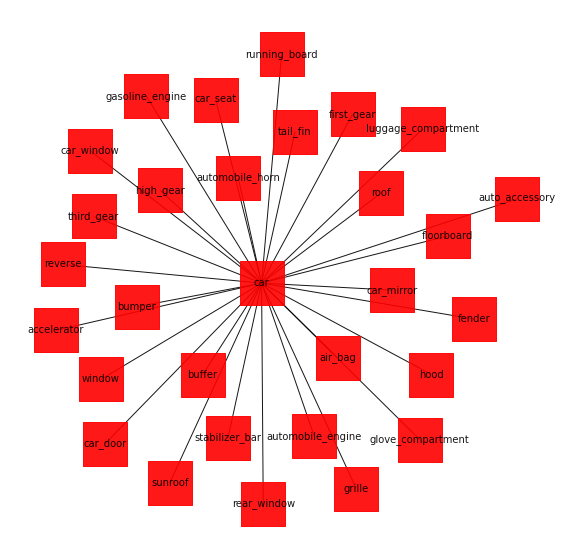

In [17]:
import networkx as nx

car = wn.synsets('car')
hyponyms = car[0].part_meronyms()

G=nx.Graph()

for w in hyponyms: 
    G.add_edge(car[0].name().split('.')[0],
               w.name().split('.')[0], 
               weight=car[0].wup_similarity(w))

plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx(G,with_labels=True,node_size=2000,
                 font_size=10,
                 node_shape='s',
                 alpha=0.9,
                 node_color='red')



# Расстояния в тезаурусе

Как оценить, насколько близки понятия/синсеты?

- Path similarity : $path = \frac{1}{|shortest\_path|}$ - чем плоха такая метрика?

<img src="../Slides/4_Thesauri/wn-3.png" width=400/>

Другие:
- Leacock & Chodorow score : $$lch(w_1,w_2) = -log{\frac{|shortest\_path(w_1,w_2)|}{2 * depth}}$$
(здесь depth - глубина всего графа)

- Wu & Palmer similarity

Введем понятие least common subsumer (LCS) - ближайший общий предок
$$wp = -log{\frac{|path(root,LCS(w_1,w_2)|}{|path(root,w_1)|*|path(root,w_2)|}}$$

- ...

In [21]:
money = wn.synsets('money')[0]
nickel = wn.synsets('nickel')[0]
print("Path similarity =", money.path_similarity(nickel))
print("Wu&Palmer =", money.wup_similarity(nickel))
# help(money)

Path similarity = 0.08333333333333333
Wu&Palmer = 0.26666666666666666


## Information-content measures

Что, если использовать ещё информацию из корпуса?

- Resnik similarity:
$$res(w_1,w_2) = IC(LCS(w_1,w_2))$$
где
$$IC(w)=log{\frac{freq(w)}{freq(root)}}$$,
а $freq(w)$ - сумма частот всех потомков вершины $w$


https://arxiv.org/PS_cache/cmp-lg/pdf/9511/9511007v1.pdf

In [22]:
from nltk.corpus import brown
brown_ic = wn.ic(brown)  # функция, которая готовит подсчёт частот по корпусу
print("Resnik similarity =", nickel.res_similarity(money, brown_ic))

Resnik similarity = 0.3749015605004214


# Другие тезаурусы

Multilingual:
- [BabelNet](https://www.babelnet.org/)
- [EuroWordNet](http://projects.illc.uva.nl/EuroWordNet/)
- [Wiktionary](https://www.wiktionary.org/)

Russian:
- [YARN](https://russianword.net/)
- [RussNet](http://project.phil.spbu.ru/RussNet/index_ru.shtml)
- [RuThez (РуТез)](http://www.labinform.ru/pub/ruthes/index.htm)


Похожий интерфейс у wiki_ru_wordnet - лексическая база на основе Викисловаря.

In [ ]:
#!pip install wiki_ru_wordnet

In [23]:
from wiki_ru_wordnet import WikiWordnet
import re
ruwn = WikiWordnet()

In [26]:
s = ruwn.get_synsets('дерево')[0]

In [27]:
for w in s.get_words():
    print(w.lemma())
    print(w.definition())
    print()

дерево
дерево~ru~дерево~ru~{{ботан.|ru}} многолетнее, как правило, крупное [[растение]] с твёрдым [[ствол]]ом, мощной корневой системой и образующими крону ветвями, покрытыми листьями или иголками {{пример|Люди с их топорами и пилами … безжалостно губили мощные дубы, широкие осины, стройные берёзки и тополя и другие {{выдел|деревья}}.|Л. А. Чарская|Золотая свирель|1912|источник=НКРЯ}} {{пример|Туманная меланхолия неизменно накреняла {{выдел|дерева́}}. Стояли {{выдел|дерева́}} наклонённые.|Андрей Белый|Северная симфония|1917|источник=НКРЯ}} {{пример|Можжевел{{-}}{{выдел|дерево}} скрытное, колкое, не допускающее в себя, замкнутое, строгое к жизни, самое мудрое из наших {{выдел|дере́в}}.|Л. М. Леонов|Барсуки|1924|источник=НКРЯ}} {{пример|{{--}}Знаешь, по чему у {{выдел|дерёв}} считают года?..|С. А. Клычков|Чертухинский балакирь|1926|источник=НКРЯ}} {{пример|Ми́ны рвали́сь в {{выдел|дерева́х}}.|Виктор Астафьев|Весёлый солдат|дата=1987–1997||Новый Мир|дата издания=1998 г.|источник=НКРЯ}} {{

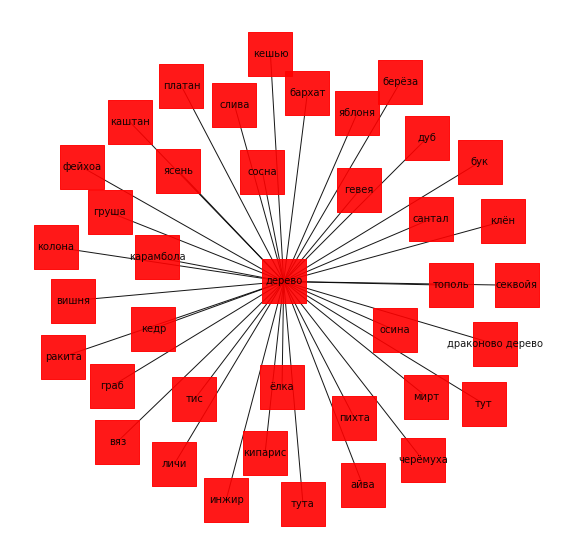

In [28]:
words = ruwn.get_synsets('дерево')
first_synset = words[0]
hyponyms = ruwn.get_hyponyms(first_synset)

G=nx.Graph()

for w in hyponyms: 
    G.add_edge('дерево',
               list(w.get_words())[0].lemma())

plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx(G,with_labels=True,node_size=2000,
                 font_size=10,
                 node_shape='s',
                 alpha=0.9,
                 node_color='red')

In [30]:
city_words = ruwn.get_synsets('страна')
first_synset = city_words[0]
for h in ruwn.get_hyponyms(first_synset):
    print(list(h.get_words())[0].lemma())

Гурия
Корея
держава
Ставропольский край
вотчина
Россия
Шумер
родина
колония


## РуТез
[ещё один тезаурус для русского языка](https://www.labinform.ru/pub/ruthes/index.htm)
* более 31.5 понятий, 111.5 тысяч различных текстовых входов (слов и выражений русского языка), более 130 тысяч с учетом значений многозначных слов;
* раздаётся в XML по запросу, мы будем использовать уже предобработанную версию.

In [31]:
import csv

rels_list = []
with open("4_Thesauri/relations_with_concepts.csv", newline='', encoding='utf8') as rels:
    reader = csv.DictReader(rels, delimiter="\t")
    for row in reader:
        rels_list.append(row)


def get_supc2(concept_list, rels_list, has_up=True, depth=0, max_depth=-1):
    """
    Get list of all hypernym chains of the query
    - up a level
    - add all 'выше' concepts to list
    [[level_1, level_2.1, level_3.1], [level_1, level_2.2, level_3.2], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hypernyms
    :param has_up: (internal) bool(current top concept has a superconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of superconcept for every meaning of query
    """
    new_cl = concept_list[:]
    if (not has_up) or depth >= max_depth > 0:
        return new_cl
    has_up = False
    for chain in concept_list:
        index = new_cl.index(chain)
        word = chain[-1]
        for row in rels_list:
            new_chain = chain[:]
            if row['from'].lower() == word.lower() and row['relation'] == 'ВЫШЕ':
                new_chain.append(row['to'].lower())
                new_cl.insert(index + 1, new_chain)
                has_up = True
        if has_up:
            new_cl.remove(chain)
    return get_supc2(new_cl, rels_list, has_up, depth+1, max_depth)


def get_supc(concept_list, rels_list, has_up=True, depth=0, max_depth=-1):
    """
    Find list of all hypernyms of query by level down
    [[level_1], [level_2.1, level_2.2], [level_3.1, level_3.2, level_3.3], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hyponyms
    :param has_up: (internal) bool(current top concept has a subconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of subconcepts for every meaning of query
    """
    if (not has_up) or depth >= max_depth > 0:
        return concept_list
    has_up = False
    new_list = []
    for word in concept_list[-1]:
        for row in rels_list:
            if row['from'].lower() == word.lower() and row['relation'] == 'ВЫШЕ':
                if all(row['to'].lower() not in hypo for hypo in concept_list):
                    new_list.append(row['to'].lower())
                    has_up = True
    if has_up:
        concept_list.append(new_list)
    return get_supc(concept_list, rels_list, has_up, depth + 1, max_depth)


def get_subc2(concept_list, rels_list, has_down=True, depth=0, max_depth=-1):
    """
    Get list of all hyponym chains for word in query
    - down a level
    - add all 'ниже' concepts to list
    [[level_1, level_2.1, level_3.1], [level_1, level_2.2, level_3.2], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hyponyms
    :param has_down: (internal) bool(current top concept has a subconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of subconcepts for every meaning of query
    """
    new_cl = concept_list[:]
    if (not has_down) or depth >= max_depth > 0:
        return new_cl
    for chain in concept_list:
        has_down = False
        index = new_cl.index(chain)
        word = chain[-1]
        for row in rels_list:
            new_chain = chain[:]
            if row['from'].lower() == word.lower() and row['relation'] == 'НИЖЕ':
                new_chain.append(row['to'].lower())
                new_cl.insert(index + 1, new_chain)
                has_down = True
        if has_down:
            new_cl.remove(chain)
    return get_subc2(new_cl, rels_list, has_down, depth+1, max_depth)


def get_subc(concept_list, rels_list, has_down=True, depth=0, max_depth=-1):
    """
    Find list of all hyponyms of query by level down
    [[level_1], [level_2.1, level_2.2], [level_3.1, level_3.2, level_3.3], etc...]

    :param concept_list: search input
    :param rels_list: imported set of relations
    :param max_depth: maximum allowed number of hyponyms
    :param has_down: (internal) bool(current top concept has a subconcept)
    :param depth: (internal) current depth in the ontology
    :return: list of subconcepts for every meaning of query
    """
    if (not has_down) or depth >= max_depth > 0:
        return concept_list
    has_down = False
    new_list = []
    for word in concept_list[-1]:
        for row in rels_list:
            if row['from'].lower() == word.lower() and row['relation'] == 'НИЖЕ':
                if all(row['to'].lower() not in hypo for hypo in concept_list):
                    new_list.append(row['to'].lower())
                    has_down = True
    if has_down:
        concept_list.append(new_list)
    return get_subc(concept_list, rels_list, has_down, depth+1, max_depth)

In [32]:
get_supc([['собака'], ['кошка']], rels_list)

[['собака'],
 ['кошка'],
 ['домашнее животное', 'кошачьи'],
 ['животное', 'хищное млекопитающее'],
 ['живой организм', 'млекопитающее', 'дикое животное', 'хищное животное'],
 ['биологическая сущность', 'позвоночное животное'],
 ['физическая сущность'],
 ['постоянная сущность']]

In [ ]:
get_supc2([['собака'], ["кошка"]], rels_list)

Получить все гипонимы для списка концептов (объединенные в списки по уровням).

In [ ]:
get_subc([['собака']], rels_list)

Получить все гипонимы для списка концептов (объединенные в списки по концепту).

In [ ]:
get_subc2([['собака']], rels_list)